### Gaussian Mixture Model

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=2,
                  random_state=2)

In [ ]:
#생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

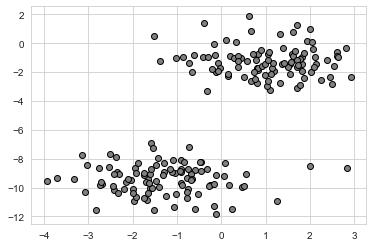

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],
           c='gray',
           edgecolor='black',
           marker='o')
plt.show()

In [4]:
#Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2,
                      random_state=0)
gmm.fit(X)
label_gmm = gmm.predict(X)
print(label_gmm)

[1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0]


In [5]:
#visualization
import pandas as pd
gmm_columns = ['gmm_comp1', 'gmm_comp2']
X_gmm_df = pd.DataFrame(X, columns=gmm_columns)
X_gmm_df['target'] = y
X_gmm_df['label_gmm'] = label_gmm
X_gmm_df.head()

,gmm_comp1,gmm_comp2,target,label_gmm
0,0.381155,-1.644815,1,1
1,-0.583904,-8.784059,0,0
2,1.830865,-1.425235,1,1
3,1.813135,-1.924671,1,1
4,-1.655771,-9.555946,0,0


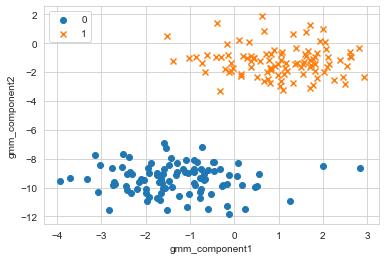

In [6]:
#GMM plot
df = X_gmm_df
markers = ['o','x']

for i, mark in enumerate(markers):
    df_i = df[df['label_gmm']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2,
               marker=mark,
               label=target_i)
plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend(loc='upper left')
plt.show()

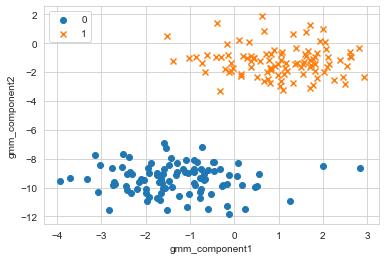

In [7]:
#actual target plot
df = X_gmm_df
markers = ['o','x']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2,
               marker=mark,
               label=target_i)
plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend(loc='upper left')
plt.show()

In [8]:
#model evaluation
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_gmm)
print(sil_score)

0.7842908753561848
